In [28]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("social_media_data.xlsm")

In [3]:
df.head()

,Platform,Post ID,Post Type,Post Content,Likes,Comments,Shares,Impressions,Audience Age,Audience Gender,Location,Audience Interests,Sentiment,Influencer ID
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,415,77,85,2619,29,Other,United Kingdom,respond,Negative,NaN
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,908,125,85,1223,48,Male,Greece,population,Neutral,NaN
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,412,419,58,2165,55,Male,United States Virgin Islands,himself,Neutral,NaN
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,667,153,29,7191,54,Other,Zambia,safe,NaN,NaN
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,659,215,34,3312,33,Other,Afghanistan,well,NaN,NaN


In [4]:
df['Platform'].value_counts()

Platform
Twitter      25160
LinkedIn     25126
Facebook     24879
Instagram    24835
Name: count, dtype: int64

In [5]:
df['Platform'] = df['Platform'].str.strip()

In [6]:
df['Location'].head(20)

0                           United Kingdom
1                                   Greece
2             United States Virgin Islands
3                                   Zambia
4                              Afghanistan
5                                 Djibouti
6                                  Jamaica
7                                Gibraltar
8                                  Estonia
9                                Guatemala
10        Lao People's Democratic Republic
11                                  Jordan
12                                   Sudan
13                                   Nepal
14                              Kazakhstan
15                                   Macao
16    United States Minor Outlying Islands
17                                 Armenia
18              Slovakia (Slovak Republic)
19                                    Oman
Name: Location, dtype: object

In [7]:
df['Likes'].value_counts()

Likes
574    137
256    132
546    127
407    126
547    124
      ... 
986     76
787     75
214     74
116     74
187     73
Name: count, Length: 1001, dtype: int64

In [8]:
df['Impressions'].value_counts()

Impressions
4136    25
7152    25
7139    24
7811    24
5168    24
        ..
4900     2
8242     2
4124     1
4347     1
8856     1
Name: count, Length: 9001, dtype: int64

In [56]:
df['Location'] = df['Location'].str.strip()

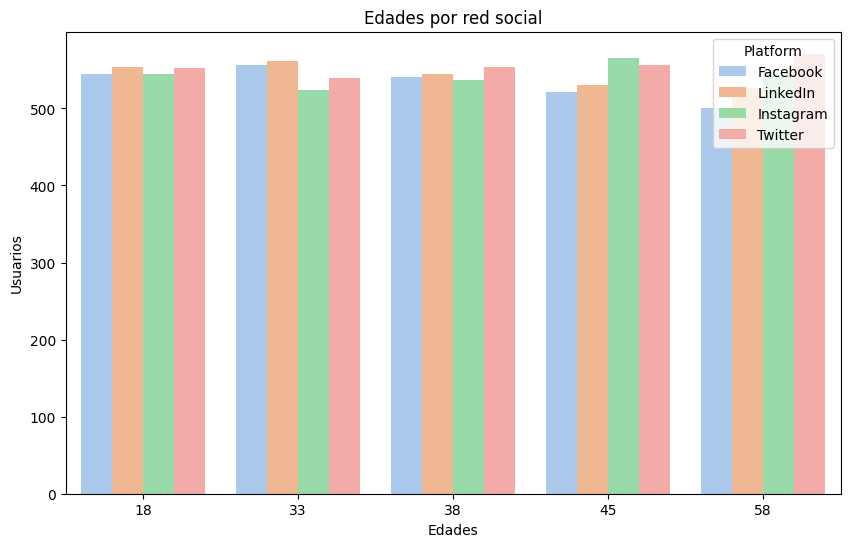

In [93]:
plt.figure(figsize=(10, 6))
top_10_locations = df['Audience Age'].value_counts().head().index
df_top_10 = df[df['Audience Age'].isin(top_10_locations)]
sns.countplot(x='Audience Age', hue='Platform', data=df_top_10, order=top_10_locations, palette='pastel')

plt.title('Edades por red social')
plt.xlabel('Edades')
plt.ylabel('Usuarios')

plt.savefig('edadesredsocial.png', bbox_inches='tight')
plt.show()

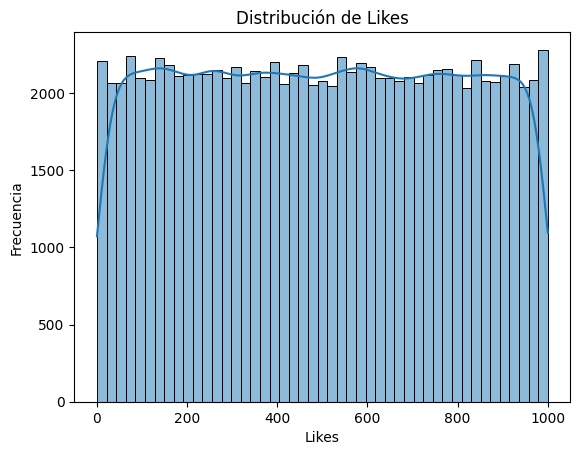

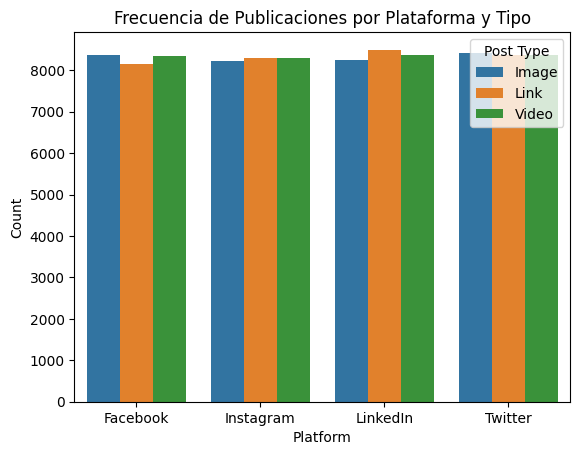

In [59]:
# Distribución de Likes
sns.histplot(df['Likes'], kde=True)
plt.title('Distribución de Likes')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

# Frecuencia de publicaciones por plataforma y tipo de publicación
platform_post_type = df.groupby(['Platform', 'Post Type']).size().reset_index(name='Count')
sns.barplot(data=platform_post_type, x='Platform', y='Count', hue='Post Type')
plt.title('Frecuencia de Publicaciones por Plataforma y Tipo')
plt.show()

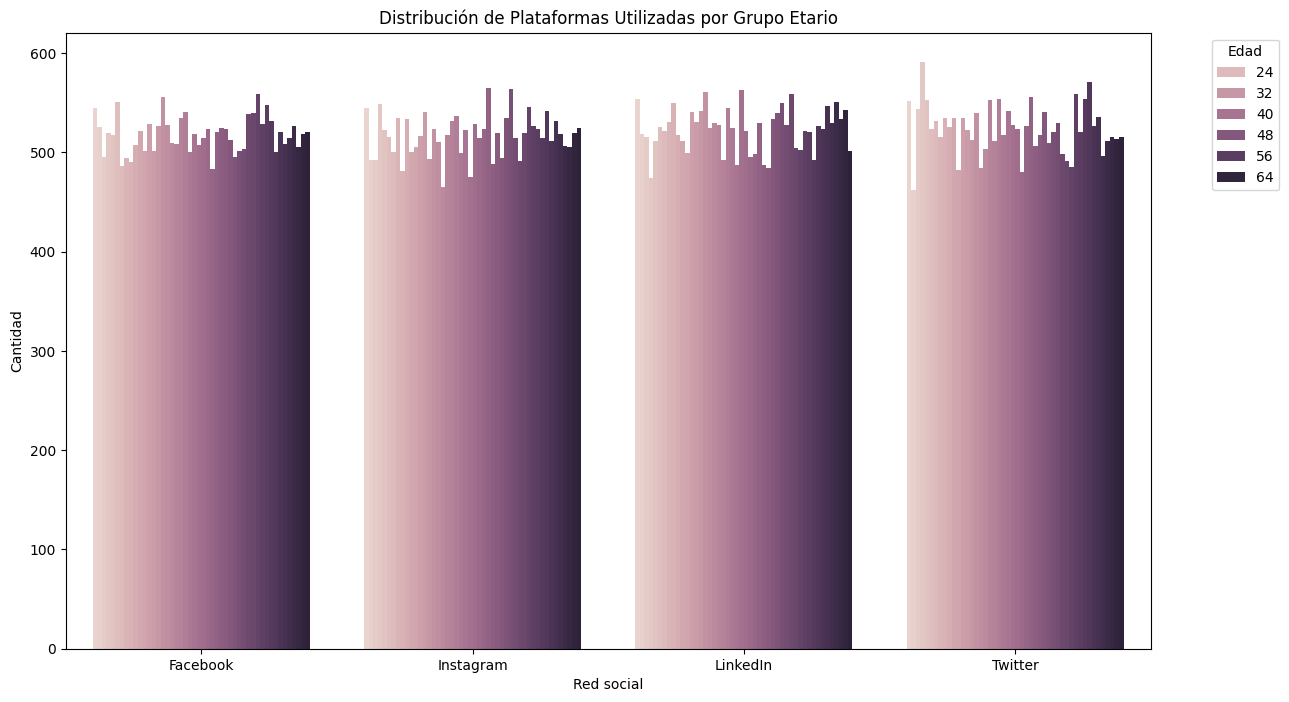

In [69]:
platform_age_group = df.groupby(['Platform', 'Audience Age']).size().reset_index(name='Count')
#gráfico de barras apiladas
plt.figure(figsize=(14, 8))
sns.barplot(data=platform_age_group, x='Platform', y='Count', hue='Audience Age')
plt.title('Distribución de Plataformas Utilizadas por Grupo Etario')
plt.xlabel('Red social')
plt.ylabel('Cantidad')
plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

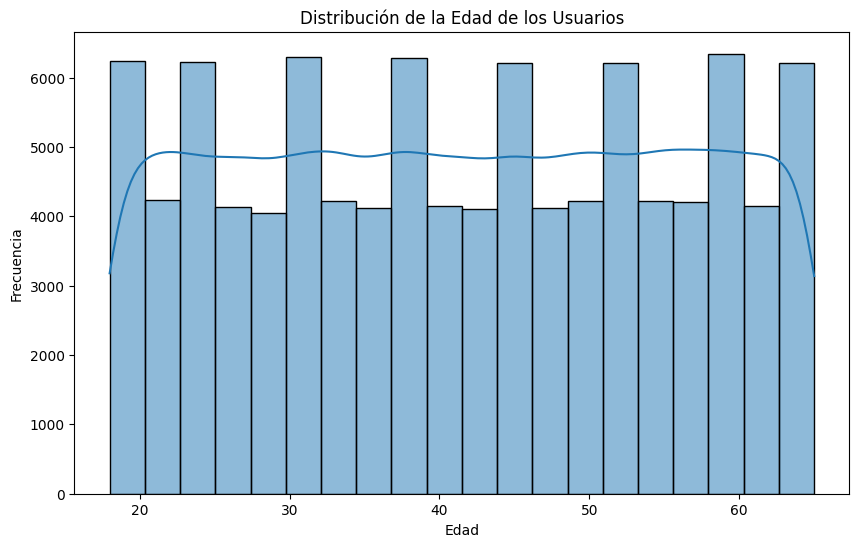

In [80]:
# Gráfico de Edad de la Audiencia
plt.figure(figsize=(10, 6))
sns.histplot(df['Audience Age'], kde=True, bins=20)
plt.title('Distribución de la Edad de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

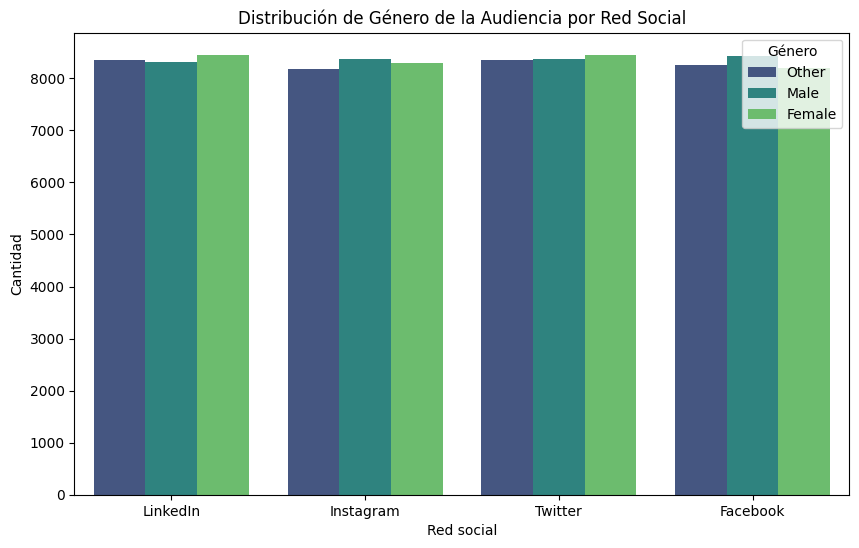

In [85]:
# Gráfico de Género por Plataforma
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Platform', hue='Audience Gender', palette='viridis')
plt.title('Distribución de Uso de Plataformas')
plt.title('Distribución de Género de la Audiencia por Red Social')
plt.xlabel('Red social')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.show()

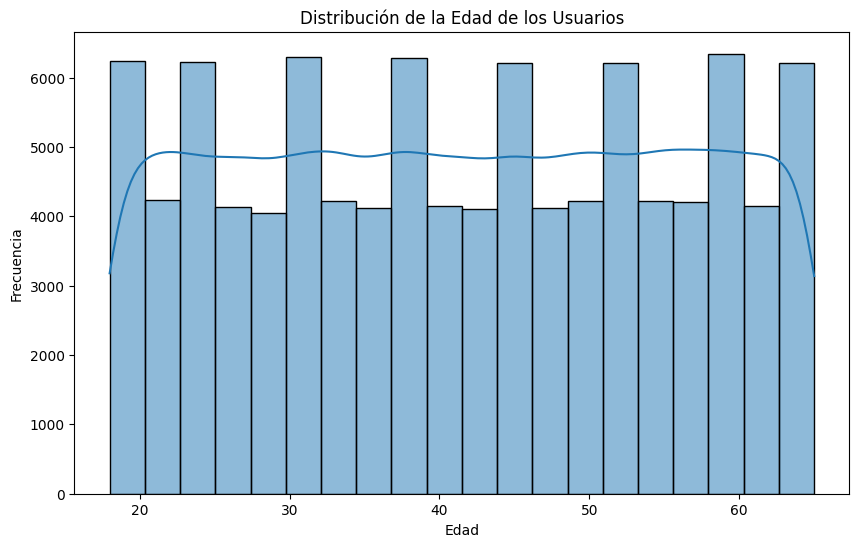

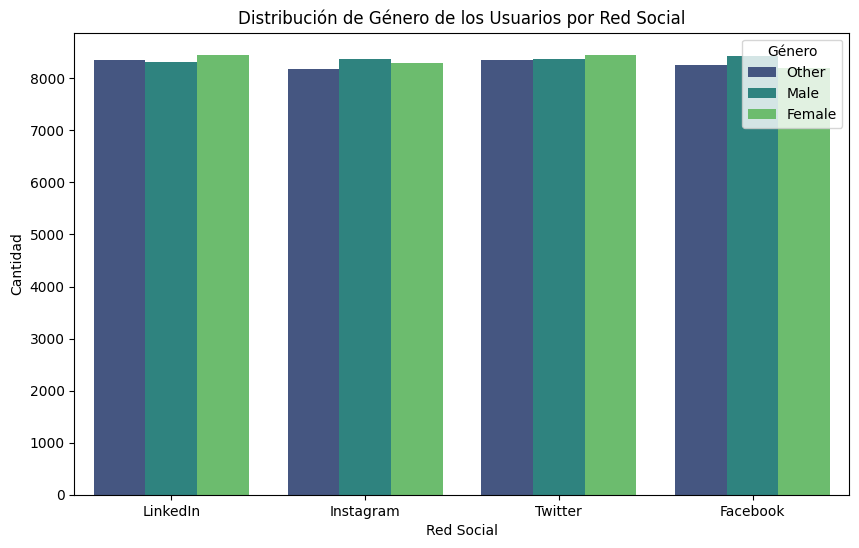

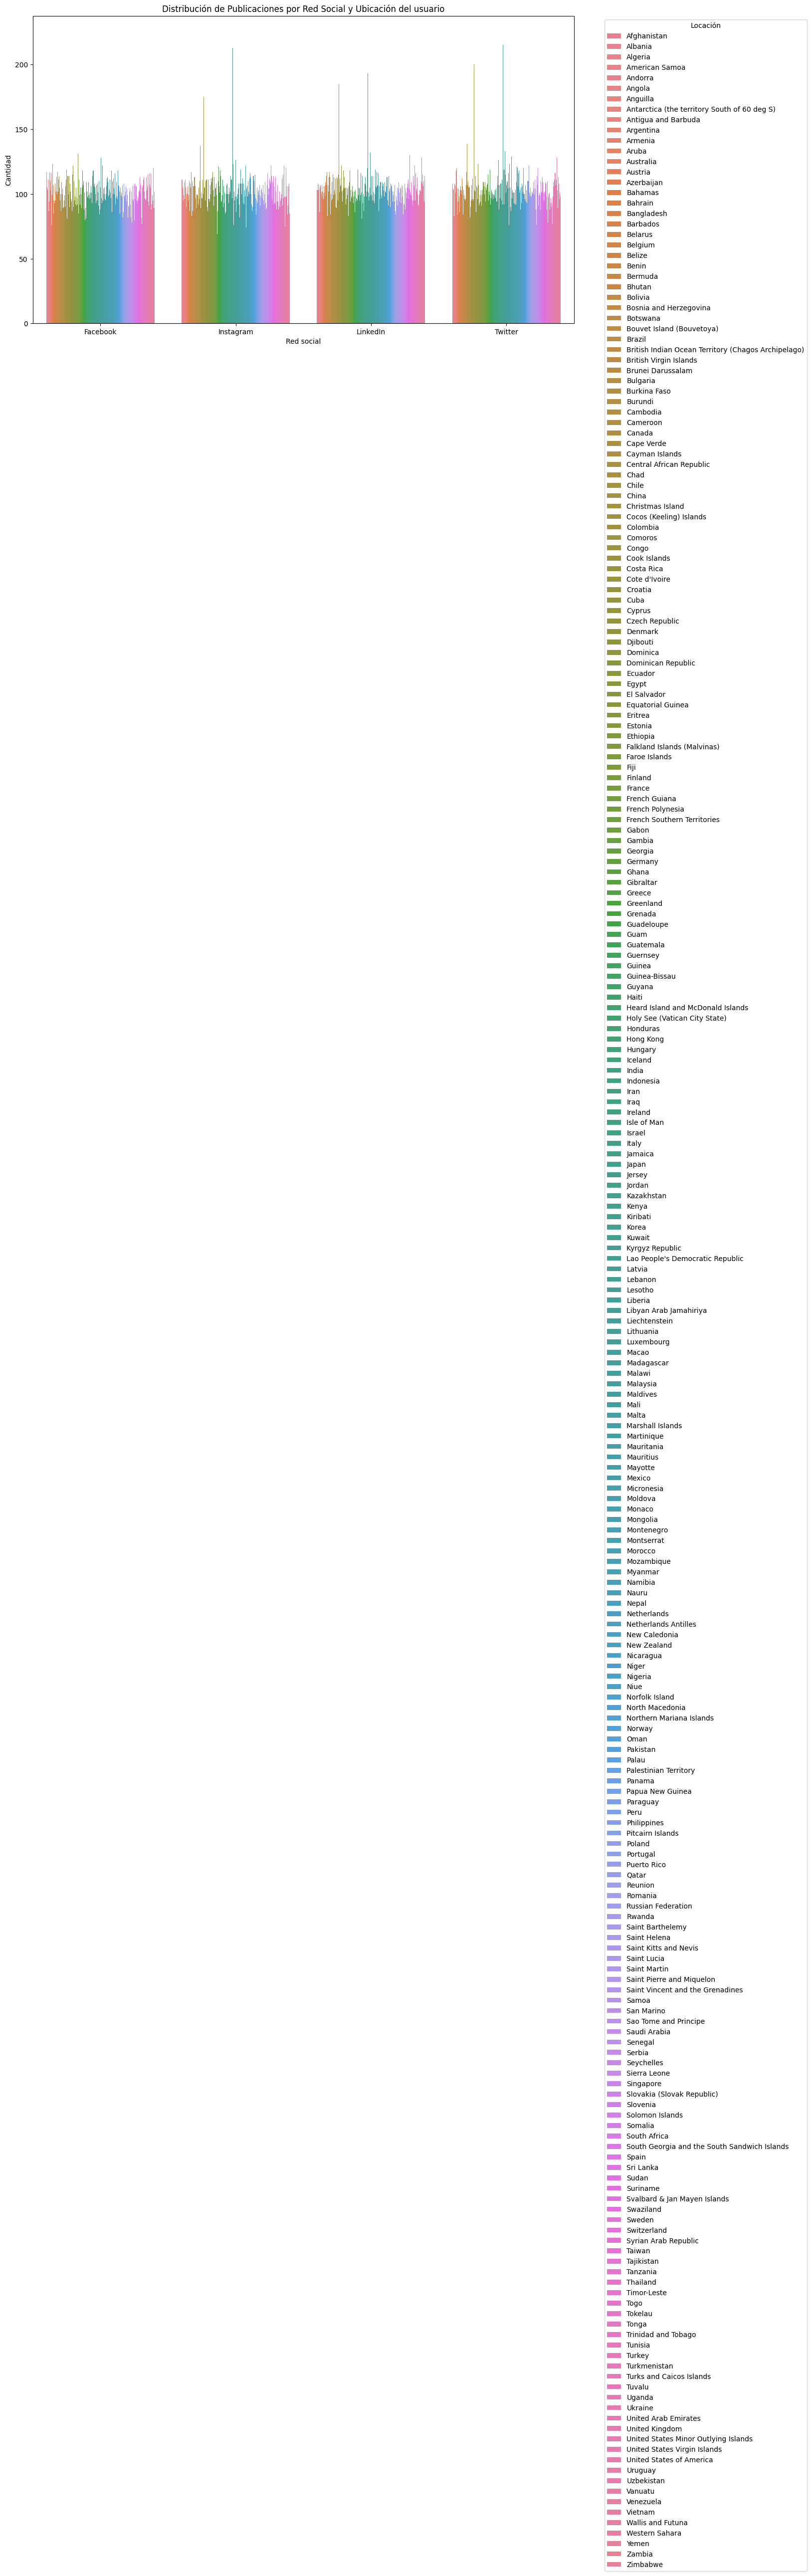

In [88]:
# Gráfico de edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Audience Age'], kde=True, bins=20)
plt.title('Distribución de la Edad de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de género de usuarios por plataforma
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Platform', hue='Audience Gender', palette='viridis')
plt.title('Distribución de Género de los Usuarios por Red Social')
plt.xlabel('Red Social')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.show()

# Gráfico de red social y ubicación
plt.figure(figsize=(14, 8))
platform_location = df.groupby(['Platform', 'Location']).size().reset_index(name='Count')
sns.barplot(data=platform_location, x='Platform', y='Count', hue='Location')
plt.title('Distribución de Publicaciones por Red Social y Ubicación del usuario')
plt.xlabel('Red social')
plt.ylabel('Cantidad')
plt.legend(title='Locación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


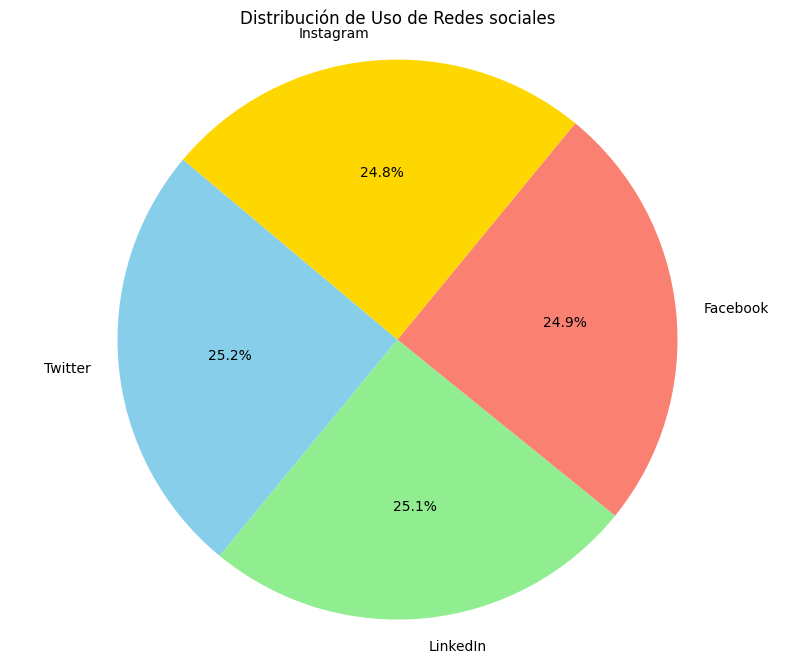

In [79]:
# Contar el número de publicaciones por plataforma
platform_counts = df['Platform'].value_counts()

# Definir los colores personalizados para cada plataforma
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Crear el gráfico de torta con colores personalizados
plt.figure(figsize=(10, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Uso de Redes sociales')
plt.axis('equal')  # Asegura que el gráfico de torta sea circular
plt.show()

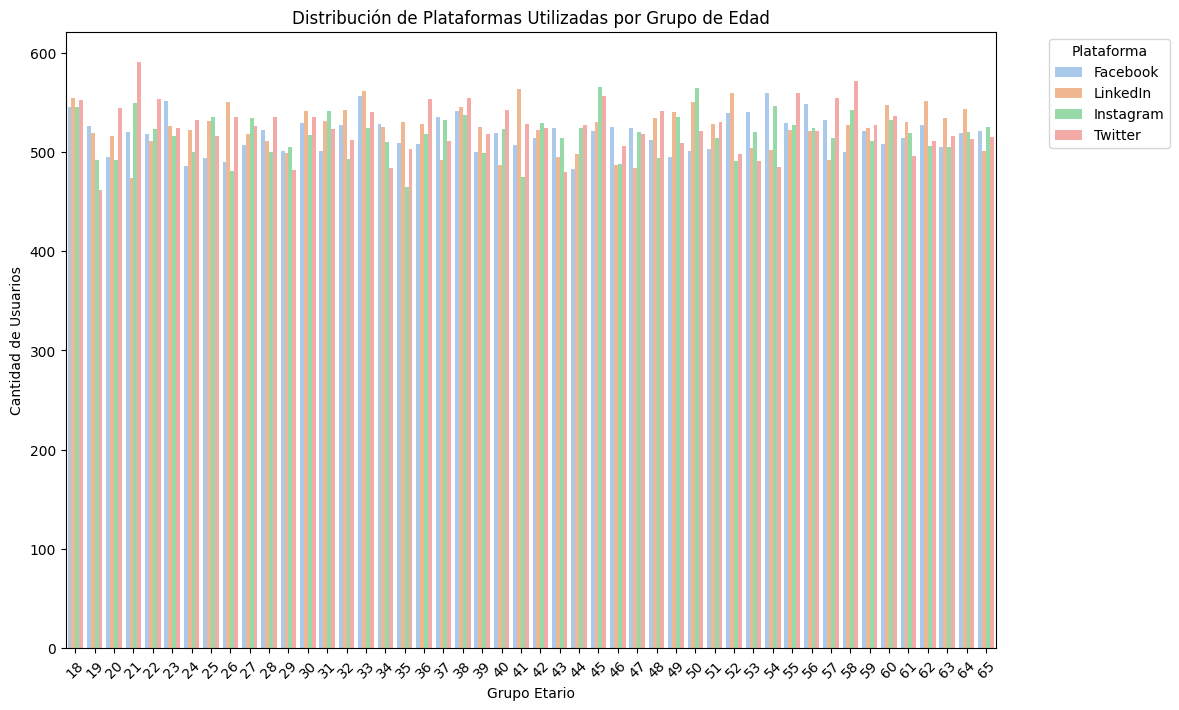

In [94]:
# Obtener las edades únicas y ordenarlas de menor a mayor
unique_ages = sorted(df['Audience Age'].unique())

# Filtrar el DataFrame para incluir solo las edades únicas
df_unique_ages = df[df['Audience Age'].isin(unique_ages)]

# Crear el gráfico de barras apiladas (countplot) con 'hue' para la plataforma
plt.figure(figsize=(12, 8))
sns.countplot(x='Audience Age', hue='Platform', data=df_unique_ages, palette='pastel', order=unique_ages)

# Configurar el título y etiquetas del gráfico
plt.title('Distribución de Plataformas Utilizadas por Grupo de Edad')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad de Usuarios')

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45)

# Añadir la leyenda fuera del gráfico para mejorar la legibilidad
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

# Guardar el gráfico como imagen
plt.savefig('edades_plataforma_ordenadas.png', bbox_inches='tight')

# Mostrar el gráfico
plt.show()

/var/folders/6t/wl3bzfp55q9gwvyf1s58j5rr0000gn/T/ipykernel_1433/3308230299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='Set1')


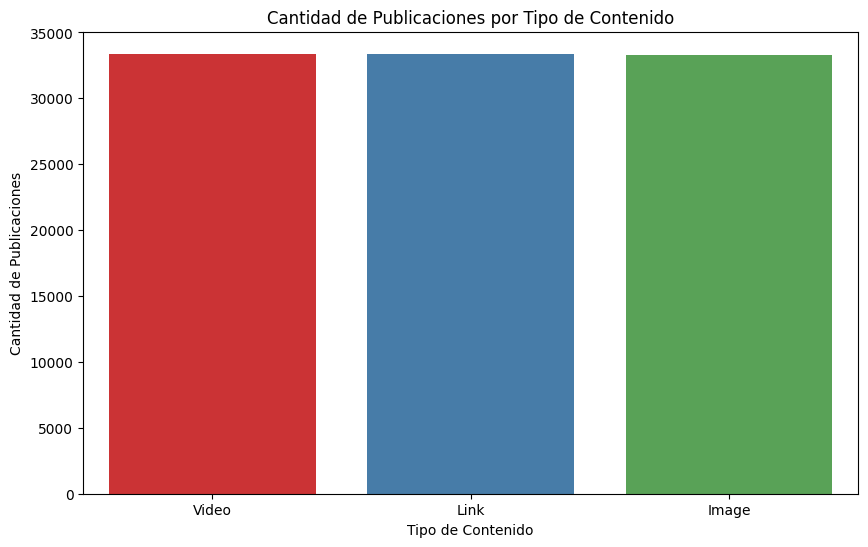

In [97]:
content_type_counts = df['Post Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='Set1')
plt.title('Cantidad de Publicaciones por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad de Publicaciones')
plt.show()

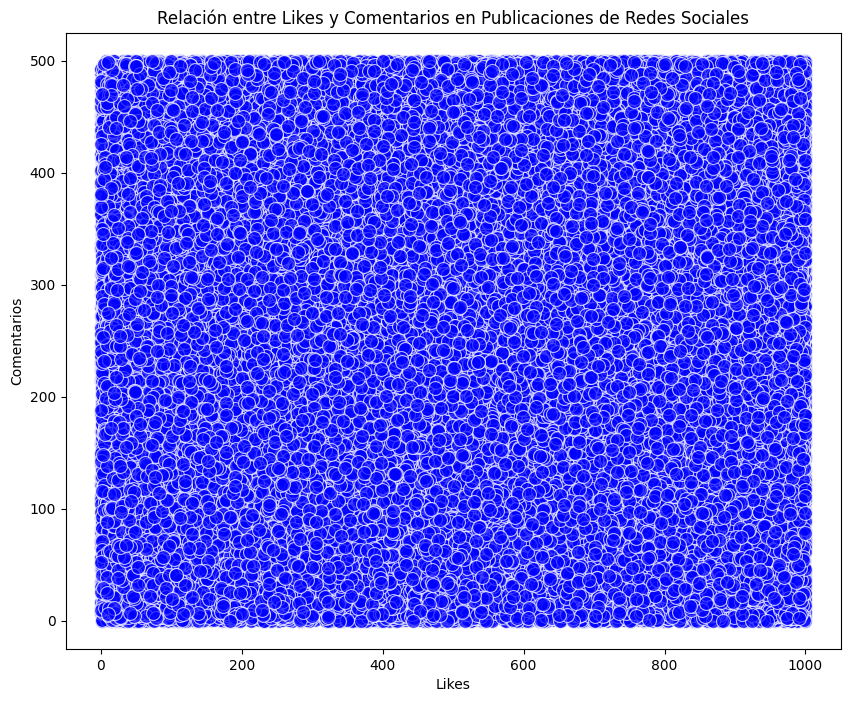

In [102]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Likes', y='Comments', data=df, alpha=0.7, s=100, color='blue')
plt.title('Relación entre Likes y Comentarios en Publicaciones de Redes Sociales')
plt.xlabel('Likes')
plt.ylabel('Comentarios')
plt.show()

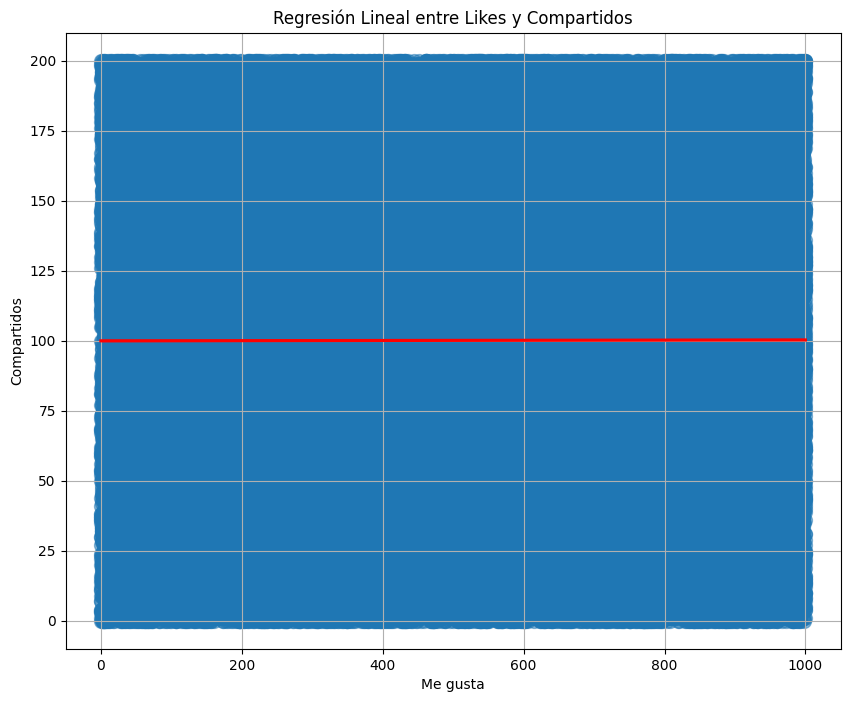

In [115]:
plt.figure(figsize=(10, 8))
sns.regplot(x='Likes', y='Shares', data=df, scatter_kws={'alpha':0.5, 's':100}, line_kws={'color':'red'})
plt.title('Regresión Lineal entre Likes y Compartidos')
plt.xlabel('Me gusta')
plt.ylabel('Compartidos')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

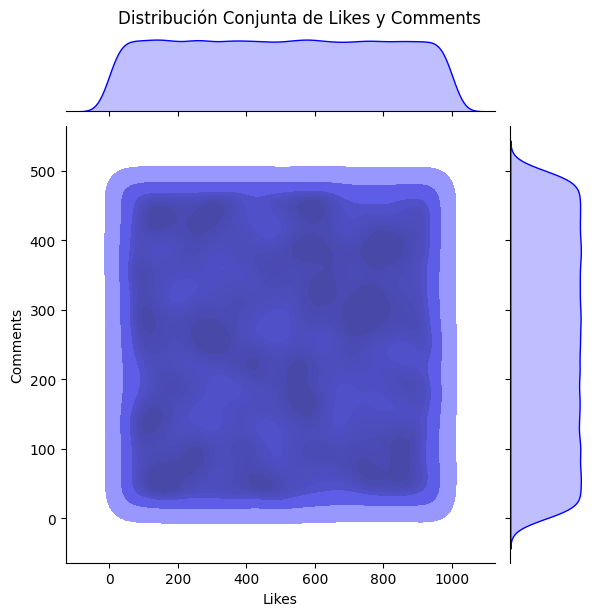

In [114]:
var1 = 'Likes'
var2 = 'Comments'

plt.figure(figsize=(8, 6))
sns.jointplot(x=var1, y=var2, data=df, kind='kde', color='blue', fill=True)

plt.suptitle(f'Distribución Conjunta de {var1} y {var2}', y=1.02)
plt.xlabel(var1)
plt.ylabel(var2)

plt.show()

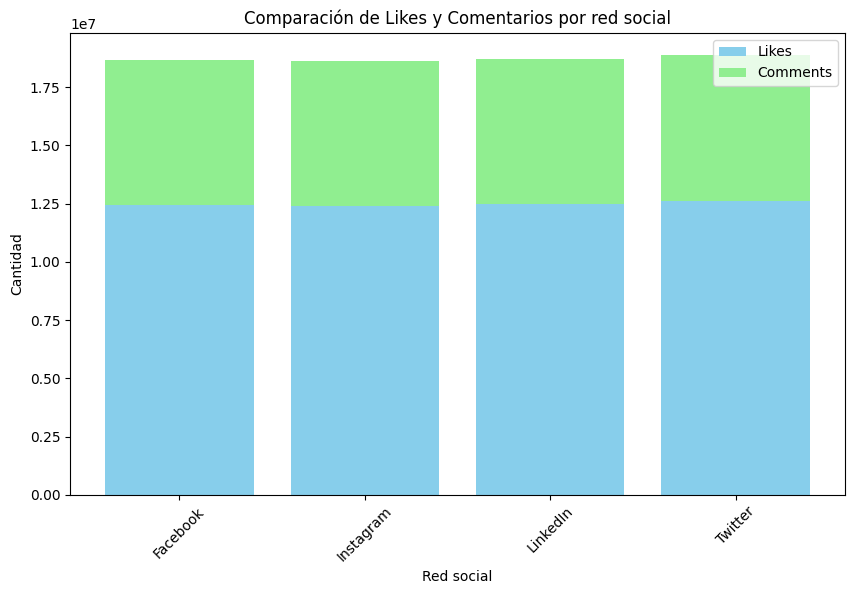

In [113]:
platform_stats = df.groupby('Platform')[['Likes', 'Comments']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(platform_stats['Platform'], platform_stats['Likes'], label='Likes', color='skyblue')
plt.bar(platform_stats['Platform'], platform_stats['Comments'], bottom=platform_stats['Likes'], label='Comments', color='lightgreen')

plt.title('Comparación de Likes y Comentarios por red social')
plt.xlabel('Red social')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()
plt.show()